In [96]:
import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression

In [31]:
data=pd.read_csv("D:\Codesoft\IRIS Flower\IRIS.csv")

In [32]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
print(data.groupby("species").size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


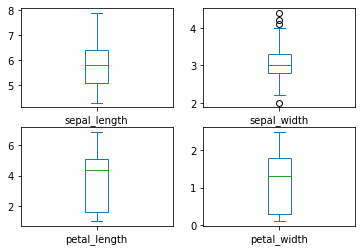

In [21]:
data.plot(kind='box',subplots=True,layout=(2,2),)
plt.show()

In [33]:
new_data=data.values

In [36]:
x=new_data[:,0:4]
y=new_data[:,4]

Extract the features from different type of flower

In [55]:
convert=[]
name="hii"
counter=0
for i in y:
    if(i==y[1]):
        convert.append(1)
    if(i==y[51]):
        convert.append(2)
    if(i==y[101]):
        convert.append(3)
convert=np.array(convert)

In [63]:
model=LinearRegression()
model.fit(x,convert)

LinearRegression()

In [67]:
prediction=model.predict(x)
print(prediction)

[0.91734173 0.96141024 0.95181031 1.01260878 0.92389183 1.05680235
 1.03762592 0.95544006 1.02070502 0.91869693 0.89827134 1.00008849
 0.91139498 0.89816529 0.7730022  0.95635941 0.9660018  0.97833114
 0.96731454 0.98775914 0.95694375 1.0531726  0.87698786 1.17725847
 1.0681889  0.99583637 1.10011902 0.92906772 0.91079163 1.01991072
 1.01336062 1.0335223  0.84153404 0.84247683 0.91869693 0.89618773
 0.850745   0.91869693 0.99358084 0.94446591 0.96660515 1.07456442
 0.98473275 1.2176738  1.13954911 1.0333738  0.94946987 0.98548459
 0.90924548 0.93716396 2.20308259 2.2845166  2.32487047 2.1876208
 2.31393877 2.25705298 2.39745639 1.90717243 2.17656176 2.24113634
 1.95929474 2.28013501 1.95420588 2.31512204 2.05930184 2.17232866
 2.38115786 1.97673409 2.35070534 2.02311961 2.59045598 2.0996557
 2.41725961 2.19756726 2.13040963 2.18772685 2.2654272  2.49592176
 2.34168532 1.85593145 2.01581766 1.93212811 2.05331264 2.54772365
 2.40310615 2.38055451 2.30141848 2.19062819 2.16837848 2.178772

In [73]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [74]:
x=new_data[:,0:4]
y=new_data[:,4]
Y_Data=np.array([np.average(x[:,i][y==j].astype('float32')) for i in range(x.shape[1]) for j in (np.unique(y))])
Y_Data_reshaped=Y_Data.reshape(4,3)
Y_Data_reshaped=np.swapaxes(Y_Data_reshaped,0,1)
x_axis=np.arange(len(columns)-1)
width=0.25

Prediction graph

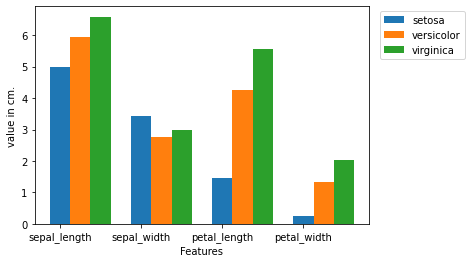

In [80]:
pyplot.bar(x_axis,Y_Data_reshaped[0],width,label='setosa')
pyplot.bar(x_axis+width,Y_Data_reshaped[1],width,label='versicolor')
pyplot.bar(x_axis+width*2,Y_Data_reshaped[2],width,label='virginica')
pyplot.xticks(x_axis,columns[:4])
pyplot.xlabel('Features')
pyplot.ylabel('value in cm.')
pyplot.legend(bbox_to_anchor=(1.3,1))
pyplot.show()

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [83]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [91]:
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s:%f(%f)'%(name,cv_results.mean(),cv_results.std()))

LR:0.941667(0.065085)
LDA:0.975000(0.038188)
KNN:0.958333(0.041667)
CART:0.941667(0.053359)
NB:0.950000(0.055277)
SVM:0.983333(0.033333)


In [92]:
model=SVC(gamma='auto')
model.fit(X_train,Y_train)
predictions=model.predict(X_test)

Prediction accuracy

In [97]:
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

